In [ ]:
import timm
import torch
import torchvision
from torchview import draw_graph

In [ ]:
model = timm.create_model(
    'maxvit_tiny_tf_224.in1k',
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
    no_jit=True
)

In [ ]:
model

In [ ]:
model_graph = draw_graph(model, input_size=(1,3,224,224), expand_nested=True)
model_graph.visual_graph

In [ ]:
from maxvit_transformer import MaxVitTransformer

In [ ]:
model = MaxVitTransformer()

In [ ]:
model

In [ ]:
img = torch.rand((2,3,224,224), dtype=torch.float32)
output = model(img)

In [ ]:
import torch
import torch.nn as nn

# Assuming you have the target values
targets = torch.tensor([[1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1]])

# Assuming you have the output
# output = [torch.tensor([[-0.0249, 0.0991]]), torch.tensor([[-0.1355, -0.0978]]), torch.tensor([[0.1073, -0.0110]]), torch.tensor([[0.0873, -0.1508]]), torch.tensor([[-0.0300, 0.1163]]), torch.tensor([[0.0107, 0.0950]]), torch.tensor([[-0.0467, 0.0918]]), torch.tensor([[-0.0066, 0.0040]]), torch.tensor([[0.0597, -0.0886]]), torch.tensor([[-0.1488, -0.1139]]), torch.tensor([[0.1449, 0.1162]]), torch.tensor([[0.1001, 0.1511]]), torch.tensor([[-0.0551, 0.1024]]), torch.tensor([[-0.0745, -0.0954]])]

# Calculate the binary cross-entropy loss
loss_fn = nn.BCEWithLogitsLoss()
loss = 0

for i in range(len(output)):
    loss += loss_fn(output[i], targets[i].float())
print(loss)
average_loss = loss / len(output)

print("Average Loss:", average_loss.item())


In [ ]:
print(output)

In [ ]:
print(output[0].shape)

In [1]:
import config
cf = config._C.clone()

In [2]:
from data.build import build_transform
transform = build_transform(True, cf)

/home/yuri/miniconda3/envs/venv3106/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
del transform.transforms[-1]

In [4]:
transform

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic, antialias=warn)
    RandomApply(
    p=0.5
    RandomRotation(degrees=[10.0, 175.0], interpolation=bicubic, expand=False, fill=0)
    RandomHorizontalFlip(p=0.5)
    RandomAffine(degrees=[15.0, 15.0], translate=(0.1, 0.3), scale=(0.8, 1.0), interpolation=bicubic)
    RandomPerspective(p=0.5)
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5))
    RandomAutocontrast(p=0.5)
    RandomAdjustSharpness(sharpness_factor=2,p=0.5)
)
    ToTensor()
    RandomApply(
    p=0.25
    <function apply_noise at 0x7f7d3e08dab0>
)
    RandomErasing(p=0.25, scale=(0.02, 0.02), ratio=(0.3, 3.3), value=0, inplace=True)
)

In [3]:
transform

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
    RandomHorizontalFlip(p=0.5)
    RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=PosterizeIncreasing, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=SolarizeIncreasing, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=ColorIncreasing, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=ContrastIncreasing, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=BrightnessIncreasing, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=SharpnessIncreasing, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=6, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=6, mstd=0.5))
    ToTensor()
    Norm

In [5]:
from torch.utils.data import Dataset
from torch.utils import data
import os
from PIL import Image

class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = sorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image).permute(1, 2, 0)
        return tensor_image

In [6]:
my_dataset = CustomDataSet('../data/images/', transform=transform)
data_loader = data.DataLoader(my_dataset , batch_size=8, shuffle=False, 
                               num_workers=1, drop_last=True)

In [7]:
next(iter(data_loader))

tensor([[[[0.1451, 0.1451, 0.1451],
          [0.0275, 0.0275, 0.0275],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0118, 0.0118, 0.0118],
          [0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157]],

         [[0.1412, 0.1412, 0.1412],
          [0.0275, 0.0275, 0.0275],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0118, 0.0118, 0.0118],
          [0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157]],

         [[0.1412, 0.1412, 0.1412],
          [0.0275, 0.0275, 0.0275],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0118, 0.0118, 0.0118],
          [0.0118, 0.0118, 0.0118],
          [0.0157, 0.0157, 0.0157]],

         ...,

         [[0.7451, 0.7451, 0.7451],
          [0.6275, 0.6275, 0.6275],
          [0.5098, 0.5098, 0.5098],
          ...,
          [0.0588, 0.0588, 0.0588],
          [0.0235, 0.0235, 0.0235],
          [0.0000, 0.0000, 0.0000]],

         [[0.7490, 0.7490, 0.7490],
          [0.6235

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


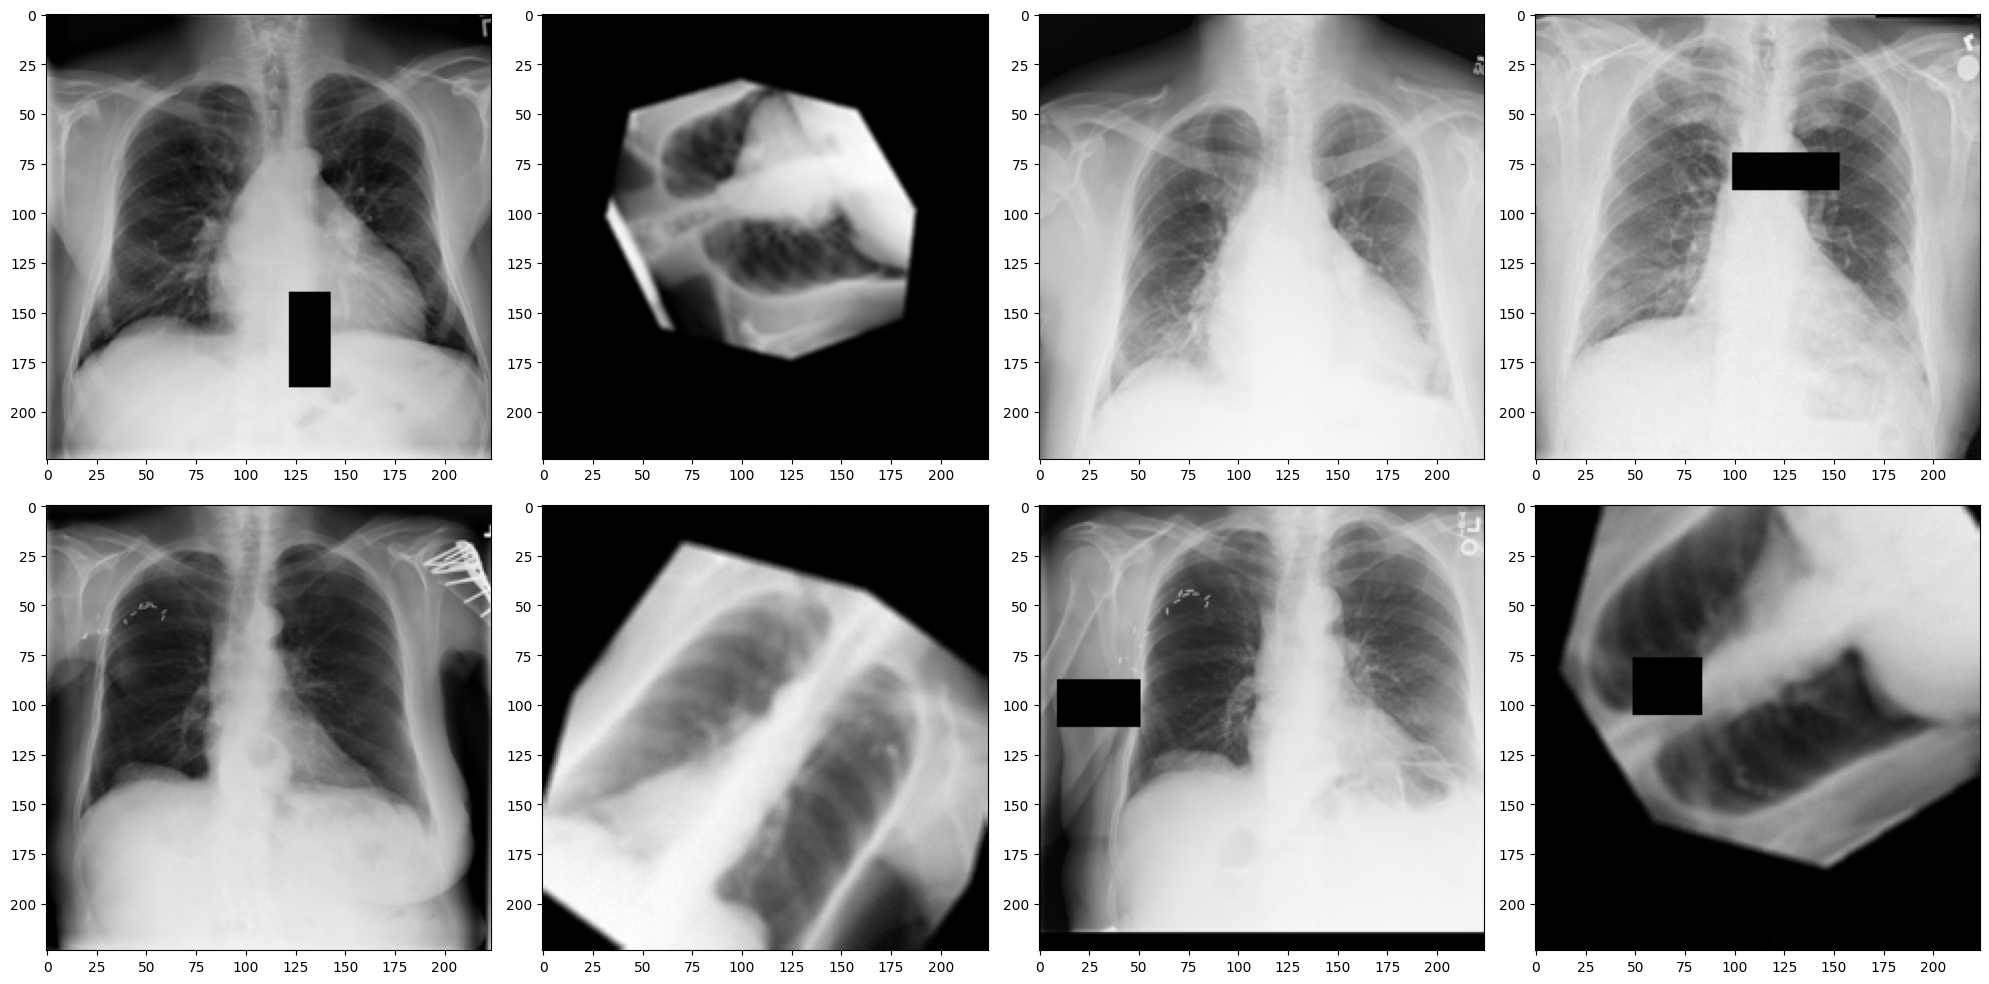

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = next(iter(data_loader))
for i in range(2):
    for j in range(4):
        ax[i,j].imshow(imgs[i*4 + j])
fig.tight_layout()
plt.show()

In [18]:
import torch
torch.min(imgs)

tensor(0.)